In [1]:
#Binary classification (true or false)
#Multiclass classification ( one photo one label)
#Multilabel classification (label classification ex wikipeddia artical having a multiple tag)
import tensorflow as tf

In [2]:
#Create data and view
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,noise=0.03,random_state=1)
X,y

(array([[ 0.83619806,  0.03563148],
        [-0.53059757, -0.6487148 ],
        [ 0.85386881, -0.61156583],
        ...,
        [ 0.31778957, -0.70184206],
        [-0.96610964,  0.15124699],
        [ 0.93619574,  0.47850311]]),
 array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 

In [3]:
import pandas as pd
circle=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circle

,X0,X1,label
0,0.836198,0.035631,1
1,-0.530598,-0.648715,1
2,0.853869,-0.611566,0
3,-0.092147,-0.965144,0
4,-1.001623,0.144467,0
...,...,...,...
995,-0.746937,-0.210731,1
996,0.645063,0.790745,0
997,0.317790,-0.701842,1
998,-0.966110,0.151247,0


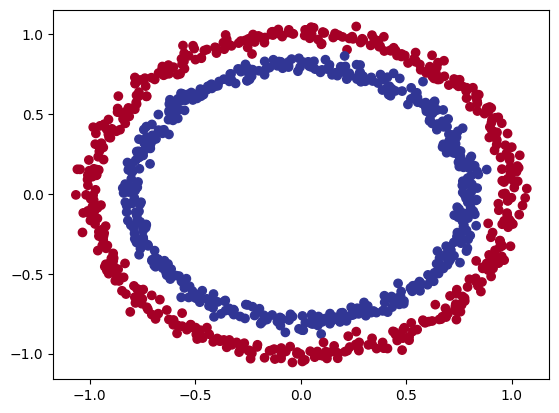

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [5]:
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [7]:
model_clas = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_clas.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

model_clas.fit(X_train,y_train,epochs=100,verbose=0)

In [8]:
model_clas.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9924 - loss: 0.0114  


[0.013571356423199177, 0.9900000095367432]

In [9]:
##Some thing is wring with shape

import numpy as np
def plot_decision_boundary(model,X,y):
  #Axis boundary
  x_min,x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  #meshgrid
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  #make prediction along this
  x_in = np.c_[xx.ravel(),yy.ravel()]#2D to 1D array
  y_pred = model.predict(x_in)
  #check for multiclass
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    #plot the prediction
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:0],X[:,1],c=y,s=40,camp=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary2(model, X, y):
    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]  # 2D to 1D array

    # Make predictions on the grid points
    y_pred = model.predict(x_in)

    # Check for multiclass or binary classification
    if y_pred.shape[1] > 1:  # Multiclass
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:  # Binary
        print("doing binary classification")
        y_pred = (y_pred > 0.5).astype(int).reshape(xx.shape)  # Threshold for binary

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
doing binary classification


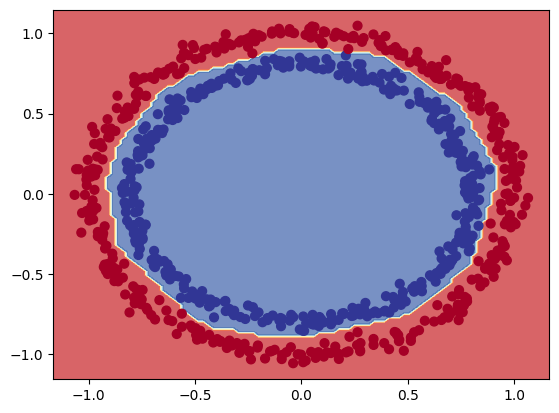

In [11]:
#model is good to predict
plot_decision_boundary2(model_clas,X_train,y_train)